In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from io import StringIO
%matplotlib inline

In [ ]:
#####Dataset taken from - https://www.kaggle.com/datasets/ahsanaseer/top-rated-tmdb-movies-10k ########
df_10k_movies = pd.read_csv('Data/10kMovies.csv')

In [3]:
###EDA AND FEATURE ANALYSIS ###

In [4]:
df_10k_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [5]:
df_10k_movies.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [6]:
df_10k_movies.isna().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [7]:
df_10k_movies.nunique()

id                   10000
title                 9661
genre                 2123
original_language       43
overview              9985
popularity            8511
release_date          6113
vote_average            42
vote_count            3191
dtype: int64

In [8]:
df_10k_movies.dtypes

id                     int64
title                 object
genre                 object
original_language     object
overview              object
popularity           float64
release_date          object
vote_average         float64
vote_count             int64
dtype: object

In [9]:
df_10k_movies = df_10k_movies.fillna('NA')

In [10]:
df_10k_movies.isna().sum()

id                   0
title                0
genre                0
original_language    0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [11]:
#### Data Cleaning #####

In [12]:
df_10k_movies_duped_titles = df_10k_movies[df_10k_movies.duplicated(subset=['title'],keep=False)]

In [13]:
df_10k_movies_duped_titles

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
10,389,12 Angry Men,Drama,en,The defense and the prosecution have rested an...,31.946,1957-04-10,8.5,6533
28,539,Psycho,"Horror,Drama,Thriller",en,When larcenous real estate clerk Marion Crane ...,41.575,1960-06-22,8.4,8288
50,244786,Whiplash,"Drama,Music",en,"Under the direction of a ruthless instructor, ...",57.858,2014-10-10,8.4,12371
88,637920,Miracle in Cell No. 7,"Drama,Comedy",tr,"Separated from his daughter, a father with an ...",49.021,2019-10-10,8.3,3968
90,670,Oldboy,"Drama,Thriller,Mystery,Action",ko,"With no clue how he came to be imprisoned, dru...",29.817,2003-11-21,8.3,6806
...,...,...,...,...,...,...,...,...,...
9933,416160,The Vault,"Horror,Thriller",en,Two estranged sisters are forced to rob a bank...,8.219,2017-09-01,4.8,328
9939,21943,I Want You,"Romance,Comedy",it,A macho type man becomes entangled with an ind...,5.706,2007-03-09,4.8,310
9991,551808,Black Christmas,"Horror,Mystery,Thriller",en,"During Christmas break, the women at Hawthorne...",9.811,2019-12-11,4.7,412
9992,853588,Prey,Thriller,de,A hiking trip into the wild turns into a despe...,64.052,2021-09-10,4.7,254


In [14]:
len(df_10k_movies['title']) - df_10k_movies['title'].nunique()

339

In [15]:
non_unique_movies = df_10k_movies[df_10k_movies.duplicated(subset=['title'])]
len(non_unique_movies)

339

In [16]:
df_no_duplicates = df_10k_movies.drop_duplicates(subset=['title'])

In [17]:
len(df_no_duplicates)

9661

In [18]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9661 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9661 non-null   int64  
 1   title              9661 non-null   object 
 2   genre              9661 non-null   object 
 3   original_language  9661 non-null   object 
 4   overview           9661 non-null   object 
 5   popularity         9661 non-null   float64
 6   release_date       9661 non-null   object 
 7   vote_average       9661 non-null   float64
 8   vote_count         9661 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 754.8+ KB


In [19]:
target_col = 'genre'
condition = df_no_duplicates[target_col].str.len() <3
short_values = df_no_duplicates[condition]
short_values

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
3361,50472,Anplagghed al cinema,NA,it,"A queue at the ATM machine, a displaced family...",4.420,2006-11-26,7.0,313
7821,43211,7 Kilos in 7 Days,NA,it,Two not very clever young doctors open a fitne...,5.885,1986-02-02,6.0,212
8518,57114,"Amore, bugie e calcetto",NA,en,NA,4.709,2008-04-04,5.8,200


In [20]:
short_genres = df_no_duplicates.loc[condition, target_col]
short_genres

3361    NA
7821    NA
8518    NA
Name: genre, dtype: object

In [21]:
row_indices = df_no_duplicates.loc[condition].index.to_list()
row_indices

[3361, 7821, 8518]

In [22]:
df_no_duplicates_with_cleaned_genres = df_no_duplicates.drop(row_indices)
len(df_no_duplicates_with_cleaned_genres)

9658

In [23]:
df_no_duplicates_with_cleaned_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9658 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9658 non-null   int64  
 1   title              9658 non-null   object 
 2   genre              9658 non-null   object 
 3   original_language  9658 non-null   object 
 4   overview           9658 non-null   object 
 5   popularity         9658 non-null   float64
 6   release_date       9658 non-null   object 
 7   vote_average       9658 non-null   float64
 8   vote_count         9658 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 754.5+ KB


In [24]:
df_no_duplicates_with_cleaned_genres.describe()

,id,popularity,vote_average,vote_count
count,9658.00000,9658.000000,9658.000000,9658.000000
mean,161230.86695,34.967737,6.636188,1550.660592
std,211567.65833,215.302056,0.766584,2666.105446
min,5.00000,0.600000,4.600000,200.000000
25%,10119.00000,9.114250,6.100000,315.000000
50%,29456.50000,13.581500,6.600000,582.500000
75%,309866.75000,25.426000,7.200000,1453.750000
max,934761.00000,10436.917000,8.700000,31917.000000


In [25]:
df_no_duplicates_with_cleaned_genres.reset_index()

,index,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811
...,...,...,...,...,...,...,...,...,...,...
9653,9994,168098,Cell,"Horror,Science Fiction,Thriller",en,When a strange signal pulsates through all cel...,19.521,2016-07-06,4.7,910
9654,9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9655,9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9656,9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332


In [26]:
df_no_duplicates_with_cleaned_genres['release_date'] = pd.to_datetime(df_no_duplicates_with_cleaned_genres['release_date'])

In [27]:
df_no_duplicates_with_cleaned_genres['genre'].head()

0             Drama,Crime
1    Comedy,Drama,Romance
2             Drama,Crime
3       Drama,History,War
4             Drama,Crime
Name: genre, dtype: object

In [28]:
genres = df_no_duplicates_with_cleaned_genres.loc[:, ['id', 'genre']]
genres.head()

,id,genre
0,278,"Drama,Crime"
1,19404,"Comedy,Drama,Romance"
2,238,"Drama,Crime"
3,424,"Drama,History,War"
4,240,"Drama,Crime"


In [47]:
genres_list = genres['genre'].str.split(',').tolist()
genres_list[1], len(genres_list)

(['Comedy', 'Drama', 'Romance'], 9658)

In [48]:
for i in range(len(genres_list)):
    if not(genres_list[i], list):
        genres_list[i] = [genres_list[i]]

In [49]:
stacked_genre = pd.DataFrame(genres_list, index=genres['id']).stack()
stacked_genre.head()

id      
278    0      Drama
       1      Crime
19404  0     Comedy
       1      Drama
       2    Romance
dtype: object

In [65]:
stacked_genre = stacked_genre.reset_index()

In [68]:
stacked_genre = stacked_genre.loc[:, ['id',0]]
stacked_genre.columns = ['id','genre']
stacked_genre.head()

,id,genre
0,278,Drama
1,278,Crime
2,19404,Comedy
3,19404,Drama
4,19404,Romance


In [69]:
merged_df_movies  = pd.merge(df_no_duplicates_with_cleaned_genres, stacked_genre, on='id', how='left')
merged_df_movies.drop(['genre_x', 'overview'], axis=1, inplace=True)
merged_df_movies = merged_df_movies.rename(columns={'genre_y': 'genre'})
merged_df_movies.head()

,id,title,original_language,popularity,release_date,vote_average,vote_count,genre
0,278,The Shawshank Redemption,en,94.075,1994-09-23,8.7,21862,Drama
1,278,The Shawshank Redemption,en,94.075,1994-09-23,8.7,21862,Crime
2,19404,Dilwale Dulhania Le Jayenge,hi,25.408,1995-10-19,8.7,3731,Comedy
3,19404,Dilwale Dulhania Le Jayenge,hi,25.408,1995-10-19,8.7,3731,Drama
4,19404,Dilwale Dulhania Le Jayenge,hi,25.408,1995-10-19,8.7,3731,Romance


In [70]:
df_no_duplicates_with_cleaned_genres['year'] = df_no_duplicates_with_cleaned_genres['release_date'].dt.year
df_no_duplicates_with_cleaned_genres.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,year
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,1994
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,1995
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,1972
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,1993
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,1974


In [71]:
merged_df_movies['year'] = merged_df_movies['release_date'].dt.year
merged_df_movies.head()

,id,title,original_language,popularity,release_date,vote_average,vote_count,genre,year
0,278,The Shawshank Redemption,en,94.075,1994-09-23,8.7,21862,Drama,1994
1,278,The Shawshank Redemption,en,94.075,1994-09-23,8.7,21862,Crime,1994
2,19404,Dilwale Dulhania Le Jayenge,hi,25.408,1995-10-19,8.7,3731,Comedy,1995
3,19404,Dilwale Dulhania Le Jayenge,hi,25.408,1995-10-19,8.7,3731,Drama,1995
4,19404,Dilwale Dulhania Le Jayenge,hi,25.408,1995-10-19,8.7,3731,Romance,1995


In [72]:
##### Visualization #####

<Axes: ylabel='count'>

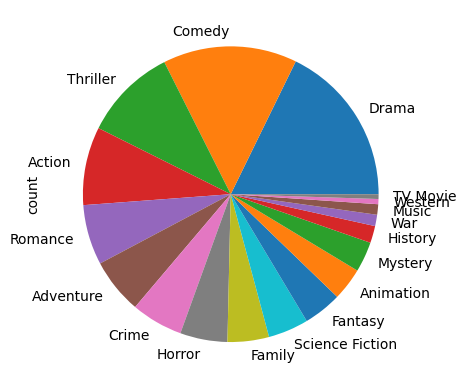

In [73]:
merged_df_movies['genre'].value_counts().plot(kind='pie')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


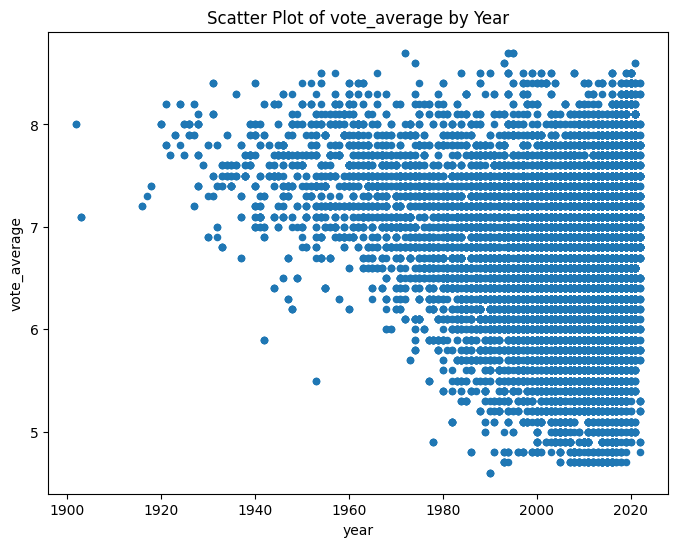

In [74]:
merged_df_movies.plot.scatter(x='year', y='vote_average', colormap='viridis', figsize=(8, 6))
plt.title('Scatter Plot of vote_average by Year')
plt.show()

In [76]:
filtered_df = merged_df_movies['popularity']
print(filtered_df.mean())

39.328555995155426


In [78]:
unique_genres = merged_df_movies['genre'].unique()
unique_genres

array(['Drama', 'Crime', 'Comedy', 'Romance', 'History', 'War', 'Family',
       'Animation', 'Fantasy', 'Thriller', 'Action', 'Western',
       'Adventure', 'Horror', 'Science Fiction', 'Music', 'Mystery',
       'TV Movie'], dtype=object)

In [111]:
def group_years(genre_name):
    filtered_movies = merged_df_movies[merged_df_movies['genre'] == genre_name].copy()
    high_filtered_df = filtered_movies.loc[:, ['year','popularity']]
    popularity_mean = high_filtered_df.groupby(['year']).mean().reset_index()
    popularity_mean.rename(columns={'popularity':'popularity_' + genre_name.lower()}, inplace=True)

    return popularity_mean

In [117]:
popularity_mean_matrix = {}

for genre in unique_genres:
    popularity_mean = group_years(genre)
    popularity_mean_matrix[genre]= popularity_mean
    
popularity_mean_matrix

{'Drama':      year  popularity_drama
 0    1916          7.756000
 1    1918          6.323000
 2    1920         15.592000
 3    1921         12.232000
 4    1924          5.843000
 ..    ...               ...
 96   2018         18.001137
 97   2019         22.596101
 98   2020         27.624781
 99   2021         54.481315
 100  2022        698.066905
 
 [101 rows x 2 columns],
 'Crime':     year  popularity_crime
 0   1903          7.445000
 1   1920         15.592000
 2   1931         10.828000
 3   1934         10.113000
 4   1938          5.474000
 ..   ...               ...
 80  2018         17.746773
 81  2019         26.408812
 82  2020         36.372393
 83  2021         95.102143
 84  2022        562.887857
 
 [85 rows x 2 columns],
 'Comedy':     year  popularity_comedy
 0   1917           8.532000
 1   1918           6.323000
 2   1921          12.931000
 3   1923           7.928000
 4   1924          10.842000
 ..   ...                ...
 93  2018          18.884455
 94

In [121]:
popularity_mean_list = list(popularity_mean_matrix.items())
df_popularity_merged = pd.DataFrame(popularity_mean_list[0][1])

for key, value in popularity_mean_list[1:]:
    df_popularity_merged = pd.merge(df_popularity_merged, value, on='year', how='left')

In [123]:
df_popularity_merged.head(100)

,year,popularity_drama,popularity_crime,popularity_comedy,popularity_romance,popularity_history,popularity_war,popularity_family,popularity_animation,popularity_fantasy,popularity_thriller,popularity_action,popularity_western,popularity_adventure,popularity_horror,popularity_science fiction,popularity_music,popularity_mystery,popularity_tv movie
0,1916,7.756000,NaN,NaN,NaN,7.756000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1918,6.323000,NaN,6.323000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1920,15.592000,15.592000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.592000,NaN,NaN,NaN,15.592000,NaN,NaN,NaN,NaN
3,1921,12.232000,NaN,12.931000,NaN,NaN,NaN,NaN,NaN,11.533000,NaN,NaN,NaN,NaN,11.533000,NaN,NaN,NaN,NaN
4,1924,5.843000,NaN,10.842000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.842000,NaN,NaN,NaN,NaN,NaN,10.842000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017,20.302982,25.774667,19.983235,20.487947,15.980148,19.534526,37.709300,39.766857,54.842976,23.115492,44.421970,20.227000,59.317155,25.787797,44.705966,38.400000,25.546388,18.540000
96,2018,18.001137,17.746773,18.884455,23.839707,19.395848,18.491000,34.061032,47.896097,34.865019,23.178654,48.945115,15.941667,60.330542,30.165414,53.059295,28.800000,25.107761,43.499000
97,2019,22.596101,26.408812,27.850325,28.990836,18.645314,24.004154,48.226667,53.406591,58.879196,29.457973,49.712910,9.407333,66.291246,38.683157,48.768756,22.051357,34.604000,33.887200
98,2020,27.624781,36.372393,34.493929,34.607667,11.613067,27.523625,66.729524,107.197300,77.724960,33.494839,67.323015,15.390000,100.738861,43.453983,50.410406,37.059000,34.313545,118.551600


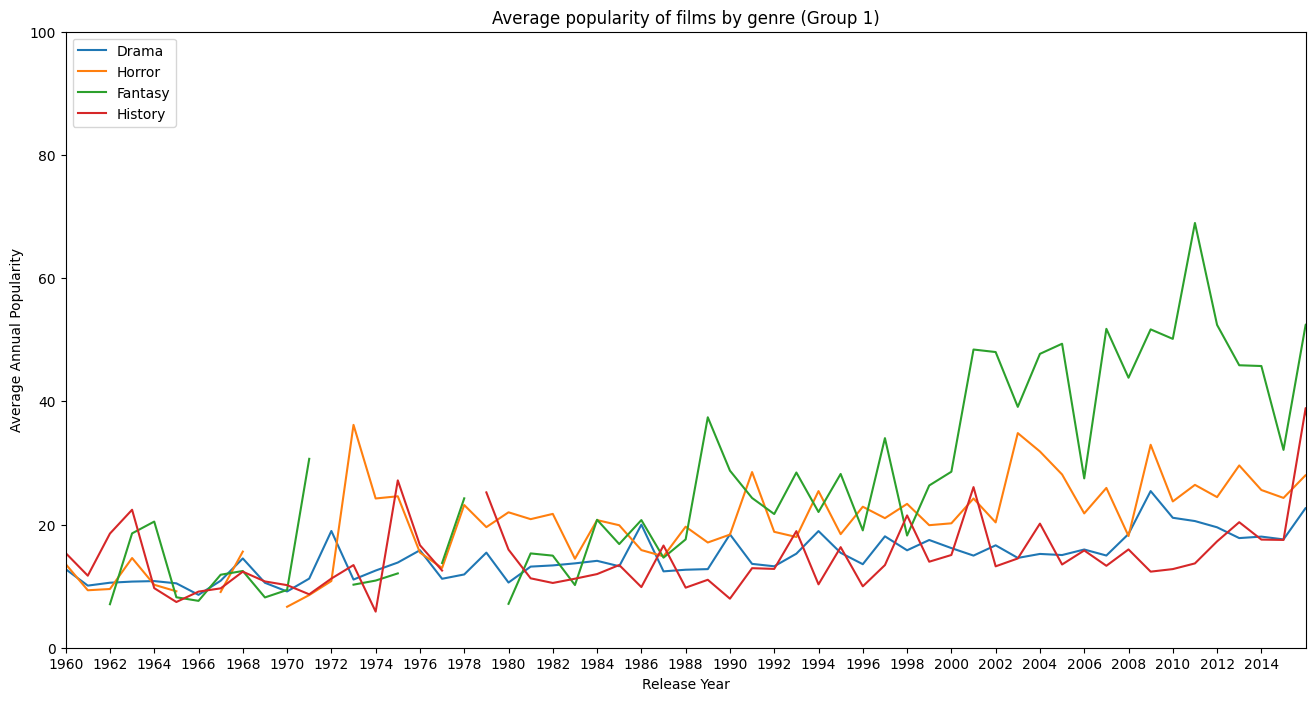

In [130]:
# group 1: drama, horror, fantasy and history
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 1)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xlim(1960, 2016)
plt.ylim(0, 100)
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('year', 'popularity_drama', data=df_popularity_merged, label="Drama")
ax.plot('year', 'popularity_horror', data=df_popularity_merged, label="Horror")
ax.plot('year', 'popularity_fantasy', data=df_popularity_merged, label="Fantasy")
ax.plot('year', 'popularity_history', data=df_popularity_merged, label="History")
ax.legend(loc='upper left');